In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import re
import  matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import csv

In [2]:
def load_data():
    data = pd.read_csv('output.csv')
    return data

In [3]:
df = pd.read_csv('output.csv')

In [4]:
df

,Label,Data_Bersih
0,1,suka belanja sesuai pesan kali belanja kemas a...
1,1,terima kasih bunga cantik kemas cepat tiba cepat
2,1,baik paket aman lengkap ka bonus terimakasih jual
3,2,rusak
4,1,terimakasih barang
...,...,...
5972,1,harga murah makassar lokasi
5973,3,sayang offline store langung pilih toko
5974,1,cantik bunga terimakasih
5975,1,bunga sesuai ekspektasi langsung pajang ruang ...


In [5]:
import nltk
from nltk.tokenize import word_tokenize
df['token_kata'] = df['Data_Bersih'].apply(lambda x : word_tokenize(x.lower()))
df

,Label,Data_Bersih,token_kata
0,1,suka belanja sesuai pesan kali belanja kemas a...,"[suka, belanja, sesuai, pesan, kali, belanja, ..."
1,1,terima kasih bunga cantik kemas cepat tiba cepat,"[terima, kasih, bunga, cantik, kemas, cepat, t..."
2,1,baik paket aman lengkap ka bonus terimakasih jual,"[baik, paket, aman, lengkap, ka, bonus, terima..."
3,2,rusak,[rusak]
4,1,terimakasih barang,"[terimakasih, barang]"
...,...,...,...
5972,1,harga murah makassar lokasi,"[harga, murah, makassar, lokasi]"
5973,3,sayang offline store langung pilih toko,"[sayang, offline, store, langung, pilih, toko]"
5974,1,cantik bunga terimakasih,"[cantik, bunga, terimakasih]"
5975,1,bunga sesuai ekspektasi langsung pajang ruang ...,"[bunga, sesuai, ekspektasi, langsung, pajang, ..."


In [6]:
#import stopword
from nltk.corpus import stopwords
list_stopwords = list(set(stopwords.words('indonesian')))

list_stopwords.extend(['ka', 'ng', 'bungaa','krg','langung', 'atidak'])
list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
  
df['hasil_preprocessing'] = df['token_kata'].apply(stopwords_removal)
df

,Label,Data_Bersih,token_kata,hasil_preprocessing
0,1,suka belanja sesuai pesan kali belanja kemas a...,"[suka, belanja, sesuai, pesan, kali, belanja, ...","[suka, belanja, sesuai, pesan, kali, belanja, ..."
1,1,terima kasih bunga cantik kemas cepat tiba cepat,"[terima, kasih, bunga, cantik, kemas, cepat, t...","[terima, kasih, bunga, cantik, kemas, cepat, c..."
2,1,baik paket aman lengkap ka bonus terimakasih jual,"[baik, paket, aman, lengkap, ka, bonus, terima...","[paket, aman, lengkap, bonus, terimakasih, jual]"
3,2,rusak,[rusak],[rusak]
4,1,terimakasih barang,"[terimakasih, barang]","[terimakasih, barang]"
...,...,...,...,...
5972,1,harga murah makassar lokasi,"[harga, murah, makassar, lokasi]","[harga, murah, makassar, lokasi]"
5973,3,sayang offline store langung pilih toko,"[sayang, offline, store, langung, pilih, toko]","[sayang, offline, store, pilih, toko]"
5974,1,cantik bunga terimakasih,"[cantik, bunga, terimakasih]","[cantik, bunga, terimakasih]"
5975,1,bunga sesuai ekspektasi langsung pajang ruang ...,"[bunga, sesuai, ekspektasi, langsung, pajang, ...","[bunga, sesuai, ekspektasi, langsung, pajang, ..."


In [7]:
import ast

def convert_text_list(text):
    texts = ast.literal_eval(str(text))
    return text

df["data_list"] = df["hasil_preprocessing"].apply(convert_text_list)


print(df["data_list"][0])

print("\ntype : ", type(df["data_list"][0]))

['suka', 'belanja', 'sesuai', 'pesan', 'kali', 'belanja', 'kemas', 'aman', 'kirim', 'cepat']

type :  <class 'list'>


In [8]:
def calc_TF(shopee_review):
    TF_dict = {}
    for term in shopee_review :
        if term in TF_dict :
            TF_dict[term] += 1
        else :
            TF_dict[term] = 1
    for term in TF_dict :
        TF_dict[term] = TF_dict[term] / len(shopee_review)
    return TF_dict

df['TF_dict'] = df['data_list'].apply(calc_TF)
df['TF_dict']

0       {'suka': 0.1, 'belanja': 0.2, 'sesuai': 0.1, '...
1       {'terima': 0.14285714285714285, 'kasih': 0.142...
2       {'paket': 0.16666666666666666, 'aman': 0.16666...
3                                          {'rusak': 1.0}
4                     {'terimakasih': 0.5, 'barang': 0.5}
                              ...                        
5972    {'harga': 0.25, 'murah': 0.25, 'makassar': 0.2...
5973    {'sayang': 0.2, 'offline': 0.2, 'store': 0.2, ...
5974    {'cantik': 0.3333333333333333, 'bunga': 0.3333...
5975    {'bunga': 0.125, 'sesuai': 0.125, 'ekspektasi'...
5976    {'cocok': 0.1111111111111111, 'crafter': 0.111...
Name: TF_dict, Length: 5977, dtype: object

In [9]:
index = 0

print('%20s' % 'term', '\t', 'TF\n')
for key in df['TF_dict'][index]:
      print('%20s' % key, '\t', df['TF_dict'][index][key])

                term 	 TF

                suka 	 0.1
             belanja 	 0.2
              sesuai 	 0.1
               pesan 	 0.1
                kali 	 0.1
               kemas 	 0.1
                aman 	 0.1
               kirim 	 0.1
               cepat 	 0.1


In [10]:
def calc_DF(tfDict) :
    count_DF = {}
    for shopee_review in tfDict:
        for term in shopee_review :
            if term in count_DF :
                count_DF[term] +=1
            else :
                count_DF[term] = 1
    return count_DF

DF = calc_DF(df['TF_dict'])
print(DF)

{'suka': 343, 'belanja': 321, 'sesuai': 725, 'pesan': 706, 'kali': 297, 'kemas': 1010, 'aman': 312, 'kirim': 999, 'cepat': 1100, 'terima': 321, 'kasih': 286, 'bunga': 1212, 'cantik': 426, 'paket': 234, 'lengkap': 198, 'bonus': 37, 'terimakasih': 383, 'jual': 616, 'rusak': 37, 'barang': 662, 'langgan': 420, 'moga': 189, 'toko': 262, 'murah': 711, 'update': 3, 'bagus': 1689, 'kirain': 19, 'ngembangtapi': 1, 'kuncuptapi': 1, 'makasih': 213, 'shopeee': 53, 'kualitas': 1202, 'produk': 571, 'harga': 1164, 'respon': 267, 'sederhanameski': 1, 'plastik': 37, 'lumayan': 215, 'kkemas': 34, 'mantap': 170, 'kilat': 13, 'ramah': 161, 'recommended': 66, 'bungabunganya': 2, 'jangkau': 227, 'ok': 155, 'ndk': 1, 'kecewa': 140, 'deskripsi': 39, 'foto': 73, 'oke': 264, 'uda': 15, 'standar': 63, 'rapih': 136, 'beli': 248, 'tahan': 31, 'saing': 12, 'sedia': 7, 'grosir': 4, 'da': 11, 'mantul': 13, 'asli': 122, 'gambar': 183, 'pilih': 20, 'kerennn': 6, 'syukur': 234, 'te': 14, 'meriahhh': 3, 'next': 131, 'tim

In [11]:
n_document = len(df)

def calc_IDF(__n_document, __DF) :
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] +1))
    return IDF_Dict

IDF = calc_IDF(n_document, DF)

In [12]:
print(n_document)

5977


In [13]:
print(DF)

{'suka': 343, 'belanja': 321, 'sesuai': 725, 'pesan': 706, 'kali': 297, 'kemas': 1010, 'aman': 312, 'kirim': 999, 'cepat': 1100, 'terima': 321, 'kasih': 286, 'bunga': 1212, 'cantik': 426, 'paket': 234, 'lengkap': 198, 'bonus': 37, 'terimakasih': 383, 'jual': 616, 'rusak': 37, 'barang': 662, 'langgan': 420, 'moga': 189, 'toko': 262, 'murah': 711, 'update': 3, 'bagus': 1689, 'kirain': 19, 'ngembangtapi': 1, 'kuncuptapi': 1, 'makasih': 213, 'shopeee': 53, 'kualitas': 1202, 'produk': 571, 'harga': 1164, 'respon': 267, 'sederhanameski': 1, 'plastik': 37, 'lumayan': 215, 'kkemas': 34, 'mantap': 170, 'kilat': 13, 'ramah': 161, 'recommended': 66, 'bungabunganya': 2, 'jangkau': 227, 'ok': 155, 'ndk': 1, 'kecewa': 140, 'deskripsi': 39, 'foto': 73, 'oke': 264, 'uda': 15, 'standar': 63, 'rapih': 136, 'beli': 248, 'tahan': 31, 'saing': 12, 'sedia': 7, 'grosir': 4, 'da': 11, 'mantul': 13, 'asli': 122, 'gambar': 183, 'pilih': 20, 'kerennn': 6, 'syukur': 234, 'te': 14, 'meriahhh': 3, 'next': 131, 'tim

In [14]:
print(IDF)

{'suka': 2.8550323914508557, 'belanja': 2.921122503279846, 'sesuai': 2.108124033999458, 'pesan': 2.1346433829276816, 'kali': 2.9985805623188497, 'kemas': 1.7769788298037827, 'aman': 2.949470858284101, 'kirim': 1.7879187698421173, 'cepat': 1.6916999121015743, 'terima': 2.921122503279846, 'kasih': 3.036191833064633, 'bunga': 1.594822139880204, 'cantik': 2.6388900355956295, 'paket': 3.2360885346800954, 'lengkap': 3.4023692240997616, 'bonus': 5.058087889097869, 'terimakasih': 2.7450314962365274, 'jual': 2.2708050249188663, 'rusak': 5.058087889097869, 'barang': 2.198899058638392, 'langgan': 2.6530412151418727, 'moga': 3.448649976663768, 'toko': 3.1235200166464896, 'murah': 2.1275961374122785, 'update': 7.3093796877043635, 'bagus': 1.2631902409071352, 'kirain': 5.699941775270263, 'ngembangtapi': 8.002526868264308, 'kuncuptapi': 8.002526868264308, 'makasih': 3.3296980338024027, 'shopeee': 4.70669000225998, 'kualitas': 1.6031003328495754, 'produk': 2.3465350574444566, 'harga': 1.63519768282445

In [15]:
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    for key in TF :
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

df['TF-IDF_dict'] = df['TF_dict'].apply(calc_TF_IDF)

In [16]:
df['TF_dict'][0]

{'suka': 0.1,
 'belanja': 0.2,
 'sesuai': 0.1,
 'pesan': 0.1,
 'kali': 0.1,
 'kemas': 0.1,
 'aman': 0.1,
 'kirim': 0.1,
 'cepat': 0.1}

In [17]:
df['TF-IDF_dict']

0       {'suka': 0.2855032391450856, 'belanja': 0.5842...
1       {'terima': 0.4173032147542637, 'kasih': 0.4337...
2       {'paket': 0.5393480891133492, 'aman': 0.491578...
3                            {'rusak': 5.058087889097869}
4       {'terimakasih': 1.3725157481182637, 'barang': ...
                              ...                        
5972    {'harga': 0.4087994207061133, 'murah': 0.53189...
5973    {'sayang': 0.934064471617821, 'offline': 1.417...
5974    {'cantik': 0.8796300118652098, 'bunga': 0.5316...
5975    {'bunga': 0.1993527674850255, 'sesuai': 0.2635...
5976    {'cocok': 0.5920420243153088, 'crafter': 0.889...
Name: TF-IDF_dict, Length: 5977, dtype: object

In [18]:
index = 0

print('%20s' % 'term', '\t', '%10s' % 'TF', '\t', '%10s' % 'TF-IDF\n')
for key in df['TF-IDF_dict'][index]:
    print('%20s' % key, '\t','%10s'% df['TF_dict'][index][key] , '\t', df['TF-IDF_dict'][index][key])

                term 	         TF 	    TF-IDF

                suka 	        0.1 	 0.2855032391450856
             belanja 	        0.2 	 0.5842245006559692
              sesuai 	        0.1 	 0.2108124033999458
               pesan 	        0.1 	 0.21346433829276817
                kali 	        0.1 	 0.299858056231885
               kemas 	        0.1 	 0.17769788298037828
                aman 	        0.1 	 0.2949470858284101
               kirim 	        0.1 	 0.17879187698421173
               cepat 	        0.1 	 0.16916999121015744


In [19]:
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:50]

unique_term = [item[0] for item in sorted_DF]

def calc_TF_IDF_Vec(__TF_IDF_Dict):
    TF_IDF_vector = [0.0] * len(unique_term)
    
    for i, term in enumerate(unique_term):
        if term in __TF_IDF_Dict:
            TF_IDF_vector[i] = __TF_IDF_Dict[term]
    return TF_IDF_vector

df['TF_IDF_Vec'] = df['TF-IDF_dict'].apply(calc_TF_IDF_Vec)

print ('Menampilkan baris pertama matrix TF_IDF_Vec Series\n')
print(df['TF_IDF_Vec'][0])

print('\n matrix size :', len(df['TF_IDF_Vec'][0]))

Menampilkan baris pertama matrix TF_IDF_Vec Series

[0.0, 0.0, 0.0, 0.0, 0.16916999121015744, 0.17769788298037828, 0.17879187698421173, 0.2108124033999458, 0.0, 0.21346433829276817, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2855032391450856, 0.5842245006559692, 0.0, 0.2949470858284101, 0.299858056231885, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

 matrix size : 50


In [20]:
TF_IDF_Vec_List = np.array(df['TF_IDF_Vec'].to_list())

sums = TF_IDF_Vec_List.sum(axis = 0)

data = []

for col, term in enumerate(unique_term):
    data.append((term, sums[col]))
    
ranking = pd.DataFrame(data, columns=['term/kata', 'rank'])
ranking.sort_values('ranking jumlah kata', ascending=False)

,term/kata,ranking jumlah kata
0,bagus,494.437269
2,kualitas,384.120430
3,harga,374.476637
1,bunga,363.144931
5,kemas,347.959876
4,cepat,326.331429
8,murah,306.518411
12,produk,272.123189
7,sesuai,269.175205
6,kirim,267.570069


In [21]:
df = df.astype({'Label' : 'category'})
df = df.astype({'Data_Bersih' : 'string'})
df = df.astype({'hasil_preprocessing' : 'string'})
df.dtypes

Label                  category
Data_Bersih              string
token_kata               object
hasil_preprocessing      string
data_list                object
TF_dict                  object
TF-IDF_dict              object
TF_IDF_Vec               object
dtype: object

In [22]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])

df["data_join"] = df["hasil_preprocessing"].apply(join_text_list)


df["data_join"].head()

0    suka belanja sesuai pesan kali belanja kemas a...
1          terima kasih bunga cantik kemas cepat cepat
2            paket aman lengkap bonus terimakasih jual
3                                                rusak
4                                   terimakasih barang
Name: data_join, dtype: object

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 100

#menghitung TF vector
cvec = CountVectorizer(max_features=max_features)
TF_vector = cvec.fit_transform(df['data_join'])

#Normalisasi TF Vector
normalized_TF_vector = normalize(TF_vector, norm = 'l1', axis =1)

#menghitung IDF
tfidf = TfidfVectorizer(max_features=max_features, smooth_idf = False)
tfs = tfidf.fit_transform(df['data_join'])
IDF_vector = tfidf.idf_

#menghitung TF X IDF sehingga menghasilkan TF IDF
tfidf_mat = TF_vector.multiply(IDF_vector).toarray()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

max_features = 100

cvect = CountVectorizer(max_features=max_features, ngram_range=(1,3))
counts = cvect.fit_transform(df['data_join'])

normalized_counts = normalize(counts, norm = 'l1', axis=1)

tfidf = TfidfVectorizer(max_features = max_features, ngram_range=(1,3), smooth_idf = False)
tfs = tfidf.fit_transform(df['data_join'])

In [25]:
type(counts)
counts.shape

(5977, 100)

In [26]:
print(tfidf.vocabulary_)

{'suka': 90, 'belanja': 14, 'sesuai': 86, 'pesan': 71, 'kali': 38, 'kemas': 42, 'aman': 0, 'kirim': 48, 'cepat': 23, 'sesuai pesan': 89, 'kemas aman': 43, 'kirim cepat': 49, 'terima': 94, 'kasih': 40, 'bunga': 18, 'cantik': 21, 'terima kasih': 95, 'bunga cantik': 20, 'kemas cepat': 45, 'paket': 69, 'lengkap': 55, 'terimakasih': 96, 'jual': 36, 'terimakasih jual': 97, 'barang': 11, 'langgan': 54, 'moga': 59, 'toko': 98, 'murah': 61, 'bagus': 2, 'makasih': 57, 'kualitas': 50, 'produk': 73, 'harga': 29, 'respon': 81, 'kualitas produk': 53, 'harga produk': 34, 'cepat kirim': 25, 'respon jual': 82, 'lumayan': 56, 'barang bagus': 12, 'bagus bunga': 4, 'bunga bagus': 19, 'mantap': 58, 'ramah': 76, 'kualitas bagus': 51, 'jual ramah': 37, 'recommended': 79, 'harga murah': 31, 'jangkau': 35, 'belanja toko': 15, 'harga jangkau': 30, 'ok': 66, 'murah kemas': 62, 'kecewa': 41, 'murah kualitas': 63, 'foto': 27, 'bagus sesuai': 9, 'kemas bagus': 44, 'bagus kualitas': 8, 'cantik bunga': 22, 'oke': 67,

In [27]:
print(tfidf.get_feature_names_out())
a=tfidf.get_feature_names_out()

['aman' 'asli' 'bagus' 'bagus bagus' 'bagus bunga' 'bagus harga'
 'bagus kemas' 'bagus kirim' 'bagus kualitas' 'bagus sesuai' 'bagusss'
 'barang' 'barang bagus' 'barang sesuai' 'belanja' 'belanja toko' 'beli'
 'bgus' 'bunga' 'bunga bagus' 'bunga cantik' 'cantik' 'cantik bunga'
 'cepat' 'cepat kemas' 'cepat kirim' 'desain' 'foto' 'gambar' 'harga'
 'harga jangkau' 'harga murah' 'harga murah kemas' 'harga murah kualitas'
 'harga produk' 'jangkau' 'jual' 'jual ramah' 'kali' 'kali pesan' 'kasih'
 'kecewa' 'kemas' 'kemas aman' 'kemas bagus' 'kemas cepat' 'kemas rapi'
 'kemas rapih' 'kirim' 'kirim cepat' 'kualitas' 'kualitas bagus'
 'kualitas oke' 'kualitas produk' 'langgan' 'lengkap' 'lumayan' 'makasih'
 'mantap' 'moga' 'muas' 'murah' 'murah kemas' 'murah kualitas' 'next'
 'next pesan' 'ok' 'oke' 'original' 'paket' 'pas' 'pesan' 'pokok' 'produk'
 'produk bagus' 'puas' 'ramah' 'rapi' 'rapih' 'recommended' 'rekomendasi'
 'respon' 'respon jual' 'sekian' 'sekian kali' 'selamat' 'sesuai'
 'sesuai

In [28]:
print(tfs.toarray())
b=tfs.toarray()

[[0.27460644 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.38656654 0.         0.         ... 0.50599989 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

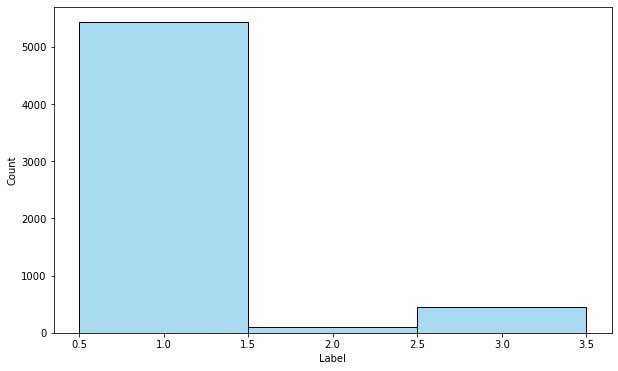

In [30]:
#visualisasi data
fig,axes = plt.subplots(1,1,figsize=(10,6))

sns.histplot(data=df, x='Label',ax=axes,color='skyblue')
plt.show()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

tvec = CountVectorizer()
X_cVec = tvec.fit_transform(df['hasil_preprocessing'].values.astype('U'))
print(X_cVec)
h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)
print(x_tfidf)

  (0, 2763)	1
  (0, 341)	2
  (0, 2625)	1
  (0, 2190)	1
  (0, 1315)	1
  (0, 1376)	1
  (0, 66)	1
  (0, 1417)	1
  (0, 637)	1
  (1, 1376)	1
  (1, 637)	2
  (1, 2891)	1
  (1, 1334)	1
  (1, 527)	1
  (1, 609)	1
  (2, 66)	1
  (2, 2086)	1
  (2, 1581)	1
  (2, 461)	1
  (2, 2895)	1
  (2, 1277)	1
  (3, 2453)	1
  (4, 2895)	1
  (4, 296)	1
  (5, 1545)	1
  :	:
  (5973, 2983)	1
  (5973, 2222)	1
  (5973, 2539)	1
  (5973, 2755)	1
  (5973, 2001)	1
  (5974, 527)	1
  (5974, 609)	1
  (5974, 2895)	1
  (5975, 2625)	1
  (5975, 527)	1
  (5975, 1555)	1
  (5975, 917)	1
  (5975, 1110)	1
  (5975, 2081)	1
  (5975, 2446)	1
  (5975, 2841)	1
  (5976, 527)	1
  (5976, 1277)	1
  (5976, 345)	1
  (5976, 2987)	1
  (5976, 507)	1
  (5976, 704)	1
  (5976, 1439)	1
  (5976, 713)	1
  (5976, 2178)	1
  (0, 2763)	0.3145882222390858
  (0, 2625)	0.25363973927678873
  (0, 2190)	0.2558037451688077
  (0, 1417)	0.22751066347755125
  (0, 1376)	0.2266179532241674
  (0, 1315)	0.3263018992372524
  (0, 637)	0.2196591066524788
  (0, 341)	0.63996248

In [32]:
x_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
# terjadi imbalance dataset. maka digunakan algoritma smote untuk menyeimbangkan data

from imblearn.over_sampling import SMOTE



In [34]:
# X adalah shopee Review / Data Bersih
# Y adalah Label

x = x_tfidf
y = df['Label']

In [35]:
#sebelum di smote

print(x.shape)
print(y.shape)

(5977, 3177)
(5977,)


In [36]:
print(y)

0       1
1       1
2       1
3       2
4       1
       ..
5972    1
5973    3
5974    1
5975    1
5976    1
Name: Label, Length: 5977, dtype: category
Categories (3, int64): [1, 2, 3]


In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from sklearn.datasets import make_classification
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(x, y)

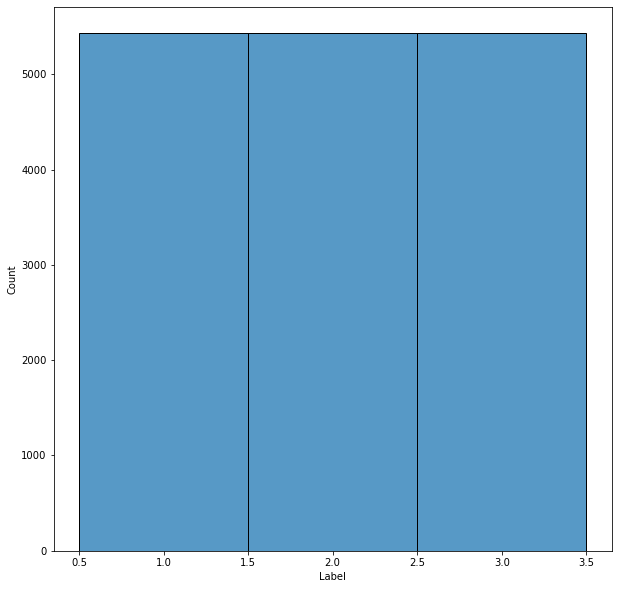

In [38]:
fig = plt.subplots(figsize=(10,10))
sns.histplot(data=y_res)
plt.show()

In [39]:
print(x_res.shape)
print(y_res.shape)

(16296, 3177)
(16296,)


In [40]:
X = x_res
Y = y_res

In [41]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=10)
X_array = x_res.toarray()
def cross_val(estimator):
    acc = []
    pcs = []
    rec = []
    
    for train_index, test_index in kf.split(X_array, Y):
        x_res, x_test = X_array[train_index], X_array[test_index]
        y_res, y_test = Y[train_index], Y[test_index]
        
        model = estimator.fit(x_res, y_res)
        y_pred = model.predict(x_test)
        
        acc.append(accuracy_score(y_test, y_pred))
        pcs.append(precision_score(y_test, y_pred, average = 'micro', zero_division=0))
        rec.append(recall_score(y_test, y_pred, average = 'micro', zero_division=0))
        pcs.append(f1_score(y_test, y_pred, average = 'micro', zero_division=0))
     
        print(classification_report(y_test, y_pred, zero_division=0))
        print(f'confusion matrix : \n {confusion_matrix(y_test, y_pred)}')
        print('=============================\n')
        
    print(f'average Akurasi :{(acc)}\n')
    print(f'average Presisi :{(pcs)}\n')
    print(f'average Recall :{(rec)}\n')
    print(f'average f1-score :{(rec)}\n')
    
    print(f'Mean average Akurasi :{np.mean(acc)}')
    print(f'Mean average Presisi :{np.mean(pcs)}')
    print(f'Mean average Recall :{np.mean(rec)}')
    print(f'Mean average f1-score :{np.mean(rec)}')
    
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
cross_val(nb)



              precision    recall  f1-score   support

           1       1.00      0.87      0.93      1453
           2       0.31      0.97      0.47        40
           3       0.54      0.91      0.68       137

    accuracy                           0.88      1630
   macro avg       0.62      0.92      0.69      1630
weighted avg       0.94      0.88      0.90      1630

confusion matrix : 
 [[1268   80  105]
 [   0   39    1]
 [   5    7  125]]

              precision    recall  f1-score   support

           1       0.99      0.88      0.93      1478
           2       0.15      1.00      0.26        12
           3       0.51      0.89      0.65       140

    accuracy                           0.88      1630
   macro avg       0.55      0.92      0.61      1630
weighted avg       0.94      0.88      0.90      1630

confusion matrix : 
 [[1298   62  118]
 [   0   12    0]
 [  10    6  124]]

              precision    recall  f1-score   support

           1       1.00      